### Java version of the Chapter 3 walkthrough
WiP. Mostly shows how to draw 3D vectors.

In [1]:
/* 
 * This jar is compiled from the Algebra module, in the raspberry-coffee repo,
 * available at https://github.com/OlivierLD/raspberry-coffee
 *
 * This library keeps evolving..., relbuild at will!
 *
 * ../gradlew shadowJar --parallel
 * cp build/libs/Algebra-1.0-all.jar .
 */
%classpath add jar "../Algebra-1.0-all.jar"

In [2]:
import gsg.SwingUtils.*;
import gsg.VectorUtils;
import static gsg.VectorUtils.Vector2D;

import javax.swing.*;
import java.awt.*;

import java.util.List;
import java.util.stream.Collectors;
import java.util.function.Consumer;
import java.util.function.Function;


In [3]:
Box3D box3D = new Box3D();

### Vanilla...

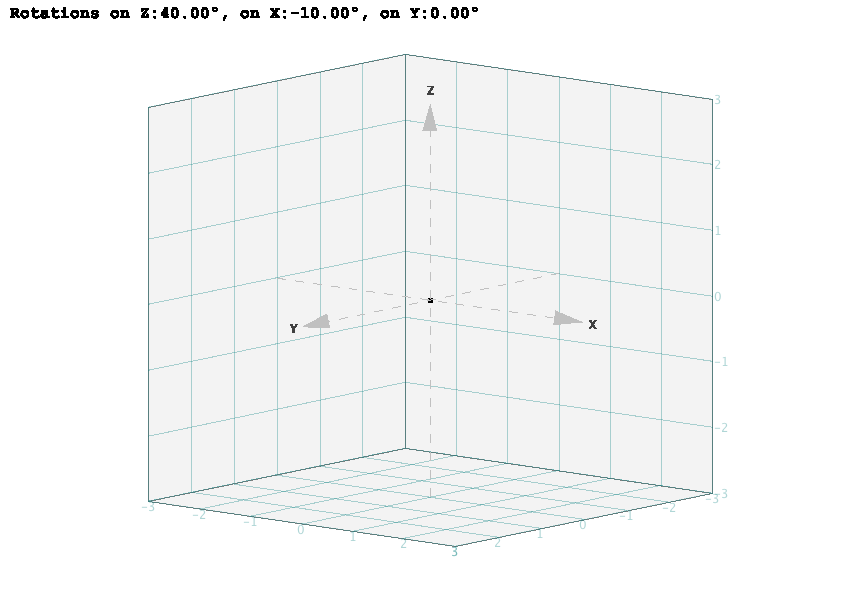

In [4]:
box3D.getImage();

## Different axis color and shape

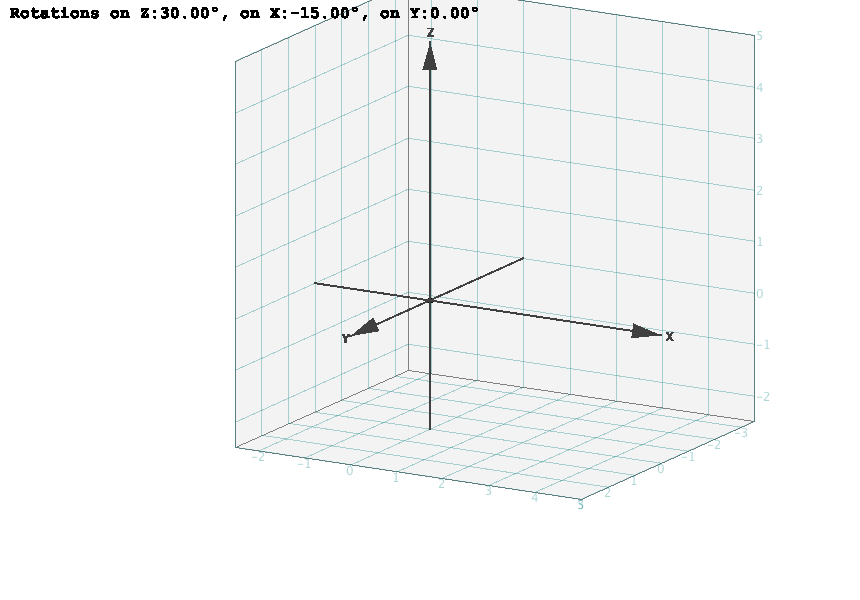

In [5]:
Stroke axisStroke = new BasicStroke(2);
box3D.setAxisStroke(axisStroke);
box3D.setAxisColor(Color.DARK_GRAY);

box3D.setxMin(-2.5d);
box3D.setxMax(5d);
box3D.setzMin(-2.5d);
box3D.setzMax(5d);
box3D.setyMin(-3.5d);

box3D.setRotOnZ(30d);
box3D.setRotOnX(-15d);

box3D.getImage();

## With extra 3D boxes
### With a vector `(4, -3, 0)`

In [6]:
Consumer<Graphics2D> afterDrawer = g2d -> {
    
    Stroke dotted = new BasicStroke(2, BasicStroke.CAP_BUTT, BasicStroke.JOIN_BEVEL, 0, new float[]{9}, 0);
    Stroke solid = new BasicStroke(1);
    g2d.setStroke(solid);
    
    VectorUtils.Vector3D centerV3 = new VectorUtils.Vector3D(0, 0, 0);
    VectorUtils.Vector3D arrowHead = new VectorUtils.Vector3D(4, -3, 0);
    
    VectorUtils.Vector3D rotatedCenter = VectorUtils.rotate(centerV3,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedHead = VectorUtils.rotate(arrowHead,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
            
    box3D.drawArrow(g2d,
              box3D.getTransformer().apply(rotatedCenter),
              box3D.getTransformer().apply(rotatedHead),
              Color.BLUE);
    
    g2d.setStroke(dotted);
    VectorUtils.Vector3D arrowHeadX = new VectorUtils.Vector3D(4, 0, 0);
    VectorUtils.Vector3D arrowHeadY = new VectorUtils.Vector3D(0, -3, 0);
    VectorUtils.Vector3D rotatedArrowX = VectorUtils.rotate(arrowHeadX,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedArrowY = VectorUtils.rotate(arrowHeadY,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
            
    g2d.setColor(Color.RED);            
    g2d.drawLine(box3D.getTransformer().apply(rotatedArrowX).x,
                 box3D.getTransformer().apply(rotatedArrowX).y,
                 box3D.getTransformer().apply(rotatedHead).x,
                 box3D.getTransformer().apply(rotatedHead).y);
    g2d.drawLine(box3D.getTransformer().apply(rotatedArrowY).x,
                 box3D.getTransformer().apply(rotatedArrowY).y,
                 box3D.getTransformer().apply(rotatedHead).x,
                 box3D.getTransformer().apply(rotatedHead).y);
                      
};
box3D.setAfterDrawer(afterDrawer);

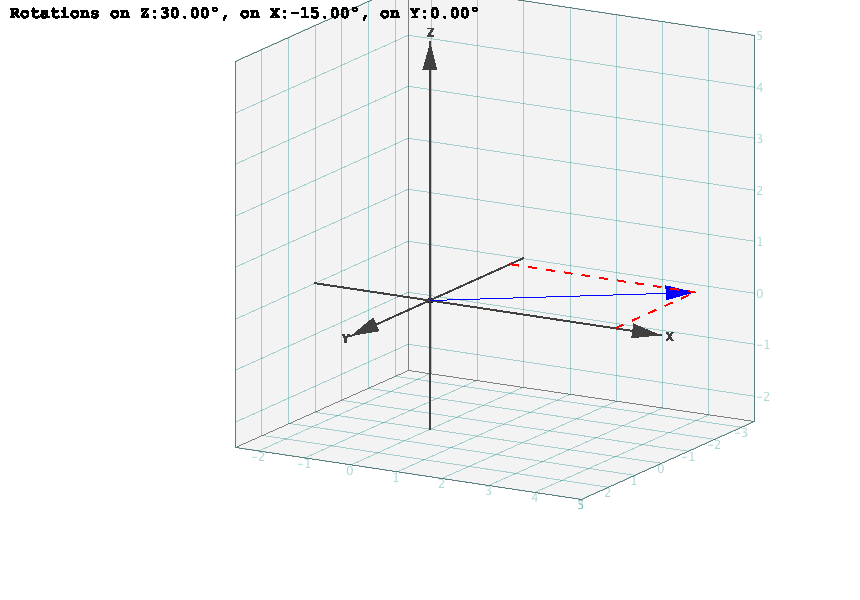

In [7]:
box3D.getImage();

### Another vector, `(4, -3, 2.5)`

In [8]:
box3D.setRotOnZ(60d);
//
Consumer<Graphics2D> afterDrawer = g2d -> {
    
    Stroke dotted = new BasicStroke(2, BasicStroke.CAP_BUTT, BasicStroke.JOIN_BEVEL, 0, new float[]{9}, 0);
    Stroke solid = new BasicStroke(1);
    g2d.setStroke(solid);
    
    VectorUtils.Vector3D centerV3 = new VectorUtils.Vector3D(0, 0, 0);
    VectorUtils.Vector3D arrowHead = new VectorUtils.Vector3D(4, -3, 2.5);
    
    VectorUtils.Vector3D rotatedCenter = VectorUtils.rotate(centerV3,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedHead = VectorUtils.rotate(arrowHead,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
            
    box3D.drawArrow(g2d,
              box3D.getTransformer().apply(rotatedCenter),
              box3D.getTransformer().apply(rotatedHead),
              Color.BLUE);
    
    g2d.setStroke(dotted);
    // Z = 0
    VectorUtils.Vector3D arrowHeadX = new VectorUtils.Vector3D(4, 0, 0);
    VectorUtils.Vector3D arrowHeadY = new VectorUtils.Vector3D(0, -3, 0);
    VectorUtils.Vector3D arrowHeadBottom = new VectorUtils.Vector3D(4, -3, 0);
    VectorUtils.Vector3D rotatedArrowX = VectorUtils.rotate(arrowHeadX,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedArrowY = VectorUtils.rotate(arrowHeadY,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedArrowBottom = VectorUtils.rotate(arrowHeadBottom,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    // Z = 2.5
    VectorUtils.Vector3D arrowHeadXTop = new VectorUtils.Vector3D(4, 0, 2.5);
    VectorUtils.Vector3D arrowHeadYTop = new VectorUtils.Vector3D(0, -3, 2.5);
    VectorUtils.Vector3D arrowHeadZTop = new VectorUtils.Vector3D(0, 0, 2.5);
    VectorUtils.Vector3D arrowHeadTop = new VectorUtils.Vector3D(4, -3, 2.5);
    VectorUtils.Vector3D rotatedArrowXTop = VectorUtils.rotate(arrowHeadXTop,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedArrowYTop = VectorUtils.rotate(arrowHeadYTop,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedArrowZTop = VectorUtils.rotate(arrowHeadZTop,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedArrowTop = VectorUtils.rotate(arrowHeadTop,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));

    g2d.setColor(Color.RED);            
    g2d.drawLine(box3D.getTransformer().apply(rotatedArrowX).x,
                 box3D.getTransformer().apply(rotatedArrowX).y,
                 box3D.getTransformer().apply(rotatedArrowBottom).x,
                 box3D.getTransformer().apply(rotatedArrowBottom).y);
    g2d.drawLine(box3D.getTransformer().apply(rotatedArrowY).x,
                 box3D.getTransformer().apply(rotatedArrowY).y,
                 box3D.getTransformer().apply(rotatedArrowBottom).x,
                 box3D.getTransformer().apply(rotatedArrowBottom).y);
                      
    g2d.drawLine(box3D.getTransformer().apply(rotatedArrowXTop).x,
                 box3D.getTransformer().apply(rotatedArrowXTop).y,
                 box3D.getTransformer().apply(rotatedArrowTop).x,
                 box3D.getTransformer().apply(rotatedArrowTop).y);
    g2d.drawLine(box3D.getTransformer().apply(rotatedArrowYTop).x,
                 box3D.getTransformer().apply(rotatedArrowYTop).y,
                 box3D.getTransformer().apply(rotatedArrowTop).x,
                 box3D.getTransformer().apply(rotatedArrowTop).y);
    // From Z-axis
    g2d.drawLine(box3D.getTransformer().apply(rotatedArrowYTop).x,
                 box3D.getTransformer().apply(rotatedArrowYTop).y,
                 box3D.getTransformer().apply(rotatedArrowZTop).x,
                 box3D.getTransformer().apply(rotatedArrowZTop).y);
    g2d.drawLine(box3D.getTransformer().apply(rotatedArrowXTop).x,
                 box3D.getTransformer().apply(rotatedArrowXTop).y,
                 box3D.getTransformer().apply(rotatedArrowZTop).x,
                 box3D.getTransformer().apply(rotatedArrowZTop).y);
    // Last Verticals, to close the cube
    g2d.drawLine(box3D.getTransformer().apply(rotatedArrowTop).x,
                 box3D.getTransformer().apply(rotatedArrowTop).y,
                 box3D.getTransformer().apply(rotatedArrowBottom).x,
                 box3D.getTransformer().apply(rotatedArrowBottom).y);
    g2d.drawLine(box3D.getTransformer().apply(rotatedArrowXTop).x,
                 box3D.getTransformer().apply(rotatedArrowXTop).y,
                 box3D.getTransformer().apply(rotatedArrowX).x,
                 box3D.getTransformer().apply(rotatedArrowX).y);
    g2d.drawLine(box3D.getTransformer().apply(rotatedArrowYTop).x,
                 box3D.getTransformer().apply(rotatedArrowYTop).y,
                 box3D.getTransformer().apply(rotatedArrowY).x,
                 box3D.getTransformer().apply(rotatedArrowY).y);
};
box3D.setAfterDrawer(afterDrawer);

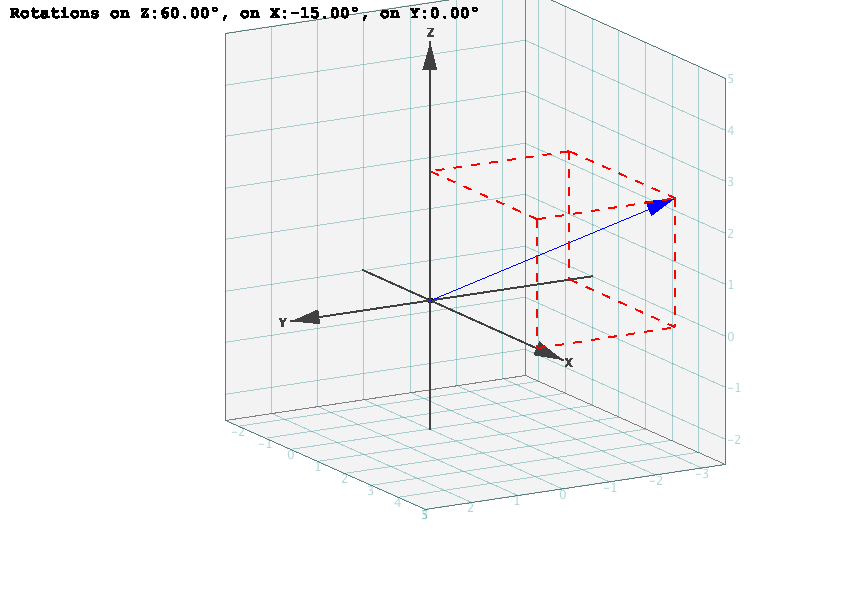

In [9]:
box3D.getImage();